<a href="https://colab.research.google.com/github/saikiran162005/Python_Project/blob/main/org_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (6841, 18)

Missing values:
 job_id                    0
title                     0
location                123
department             4321
salary_range           5762
company_profile        1517
description               0
requirements            935
benefits               2739
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        1647
required_experience    2809
required_education     3122
industry               2062
function               2559
fraudulent                1
dtype: int64


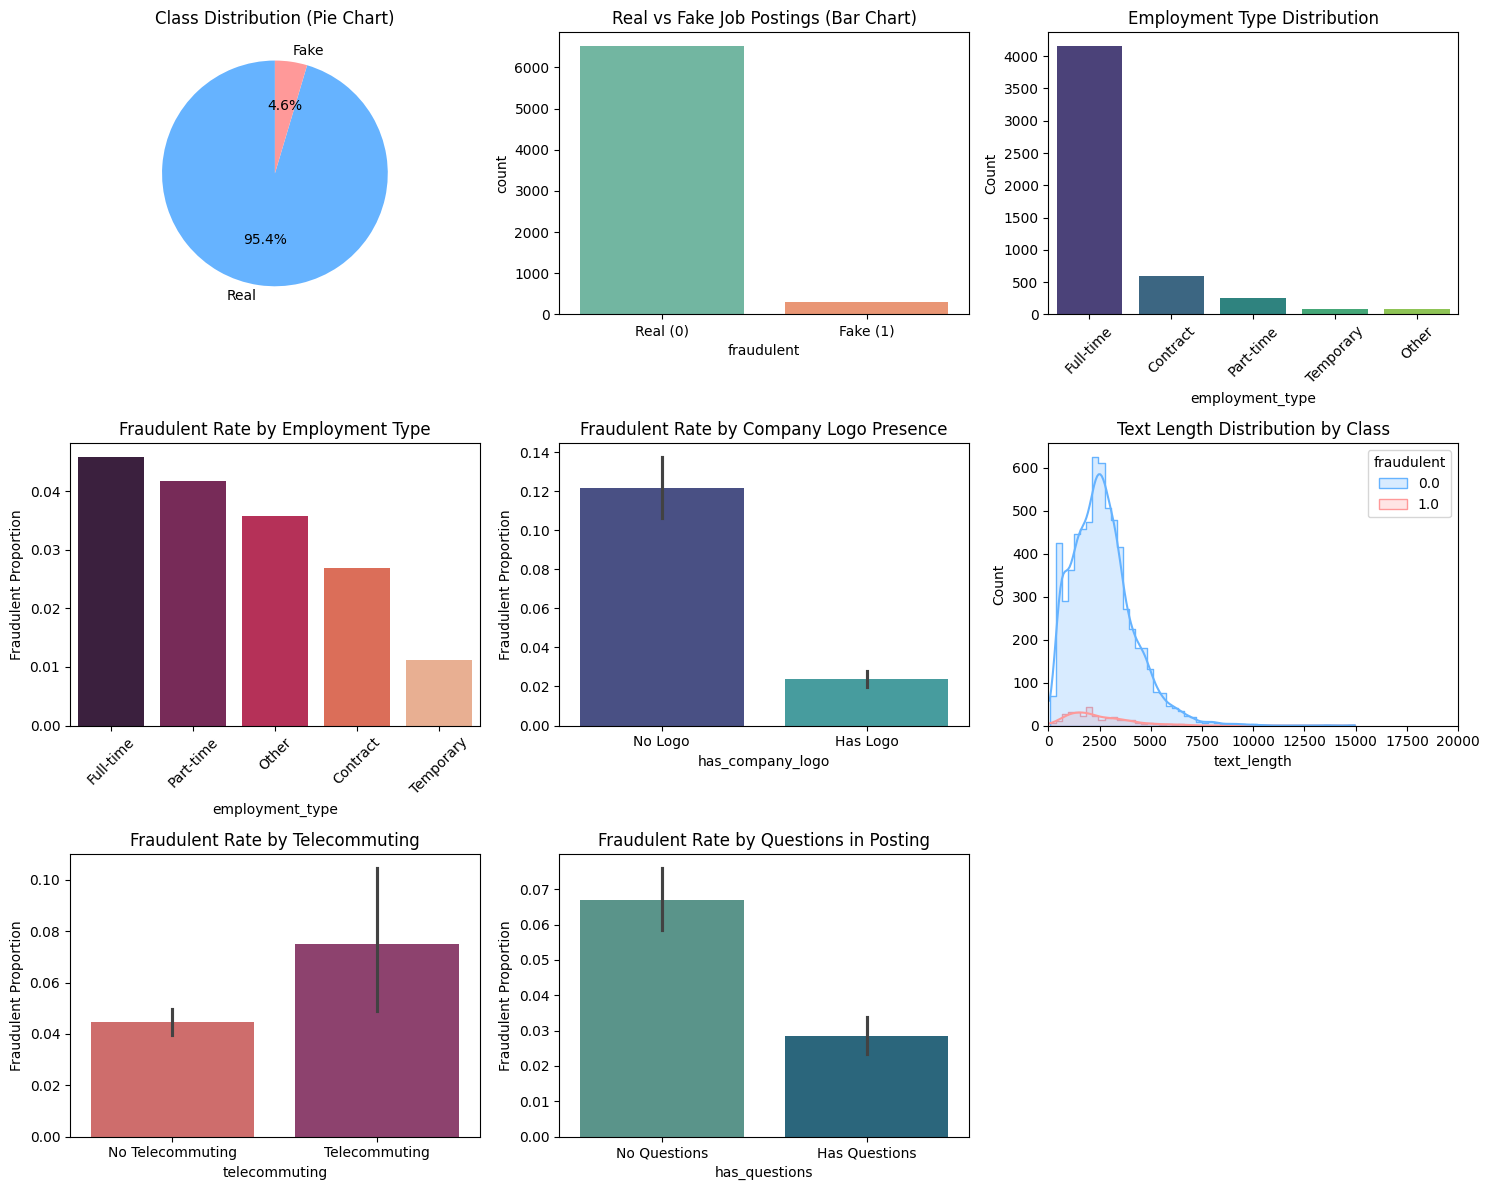

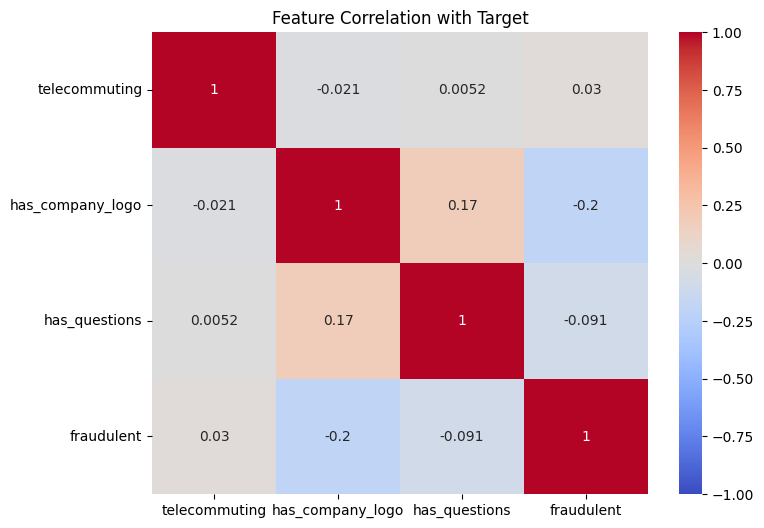

ValueError: Input y contains NaN.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('/content/fake_job_postings.csv')

# Basic info
print("Dataset Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Fill missing values (using recommended approach)
df = df.assign(
    title=df['title'].fillna(''),
    description=df['description'].fillna(''),
    requirements=df['requirements'].fillna(''),
    company_profile=df['company_profile'].fillna(''),
    benefits=df['benefits'].fillna('')
)

# Combine text features
df['text'] = df['title'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

# -------------------------------------------
# 🔍 Enhanced EDA Visualizations
# -------------------------------------------

plt.figure(figsize=(15, 12))

# 1. Class distribution - Pie and Bar charts
plt.subplot(3, 3, 1)
class_counts = df['fraudulent'].value_counts()
plt.pie(class_counts, labels=['Real', 'Fake'], autopct='%1.1f%%',
        colors=['#66b3ff','#ff9999'], startangle=90)
plt.title("Class Distribution (Pie Chart)")

plt.subplot(3, 3, 2)
sns.countplot(data=df, x='fraudulent', hue='fraudulent', palette='Set2', legend=False)
plt.title("Real vs Fake Job Postings (Bar Chart)")
plt.xticks([0, 1], ['Real (0)', 'Fake (1)'])

# 2. Employment type distribution
plt.subplot(3, 3, 3)
employment_counts = df['employment_type'].value_counts()
sns.barplot(x=employment_counts.index, y=employment_counts.values, hue=employment_counts.index, palette='viridis', legend=False)
plt.title("Employment Type Distribution")
plt.xticks(rotation=45)
plt.ylabel("Count")

# 3. Fraudulent rate by employment type
plt.subplot(3, 3, 4)
fraud_by_emp = df.groupby('employment_type')['fraudulent'].mean().sort_values(ascending=False)
sns.barplot(x=fraud_by_emp.index, y=fraud_by_emp.values, hue=fraud_by_emp.index, palette='rocket', legend=False)
plt.title("Fraudulent Rate by Employment Type")
plt.xticks(rotation=45)
plt.ylabel("Fraudulent Proportion")

# 4. Company logo presence vs fraudulent
plt.subplot(3, 3, 5)
sns.barplot(data=df, x='has_company_logo', y='fraudulent', hue='has_company_logo', palette='mako', legend=False)
plt.title("Fraudulent Rate by Company Logo Presence")
plt.xticks([0, 1], ['No Logo', 'Has Logo'])
plt.ylabel("Fraudulent Proportion")

# 5. Text length distribution
plt.subplot(3, 3, 6)
df['text_length'] = df['text'].apply(len)
sns.histplot(data=df, x='text_length', hue='fraudulent', bins=50,
             palette=['#66b3ff','#ff9999'], kde=True, element='step')
plt.title("Text Length Distribution by Class")
plt.xlim(0, 20000)  # Limit to 20k characters for better visibility

# 6. Telecommuting vs fraudulent
plt.subplot(3, 3, 7)
sns.barplot(data=df, x='telecommuting', y='fraudulent', hue='telecommuting', palette='flare', legend=False)
plt.title("Fraudulent Rate by Telecommuting")
plt.xticks([0, 1], ['No Telecommuting', 'Telecommuting'])
plt.ylabel("Fraudulent Proportion")

# 7. Questions in posting vs fraudulent
plt.subplot(3, 3, 8)
sns.barplot(data=df, x='has_questions', y='fraudulent', hue='has_questions', palette='crest', legend=False)
plt.title("Fraudulent Rate by Questions in Posting")
plt.xticks([0, 1], ['No Questions', 'Has Questions'])
plt.ylabel("Fraudulent Proportion")

plt.tight_layout()
plt.show()

# 9. Correlation heatmap for selected binary/numeric features
plt.figure(figsize=(8, 6))
corr = df[['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation with Target")
plt.show()

# -------------------------------------------
# 🤖 Model Training (Logistic Regression)
# -------------------------------------------

X = df['text']
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# -------------------------------------------
# 📊 Evaluation
# -------------------------------------------

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()